In [1]:
import numpy as np
import spatialscaper as ss
from spatialscaper.sofa_utils import load_pos
import os
import librosa as lr
import matplotlib.pyplot as plt
from IPython.display import Audio

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Constants
NSCAPES = 20  # Number of soundscapes to generate
FOREGROUND_DIR = "/Users/chrisick/Documents/SpatialScaper/datasets/minecraft_sounds"
RIR_DIR = "/Users/chrisick/Documents/SpatialScaper/datasets/sadie/D1_BRIR_SOFA"  # Directory containing Room Impulse Response (RIR) files
ROOM = "D1_48K_24bit_0.3s_FIR_SOFA.sofa"  # Initial room setting, change according to available rooms listed below
FORMAT = "mic"  # Output format specifier
DURATION = 30  # Duration in seconds of each soundscape, customizable by the user
SR = 48000  # SpatialScaper default sampling rate for the audio files
OUTPUT_DIR = "./"  # Directory to store the generated soundscapes
REF_DB = -65  # Reference decibel level for the background ambient noise. Try making this random too!
OUT_DIR = '../outputs'

soundfiles = os.listdir(FOREGROUND_DIR)
class_labels = {}
filepaths = []
for soundfile in soundfiles:
    if '.ogg' in soundfile:
        class_name = soundfile.split('.')[0]
        class_labels[class_name] = len(class_labels)
        filepaths.append(os.path.join(FOREGROUND_DIR, soundfile))
    else:
        pass
classes = list(class_labels.keys())

Text(0.5, 0.92, 'Sadie II D1 BRIR Coords')

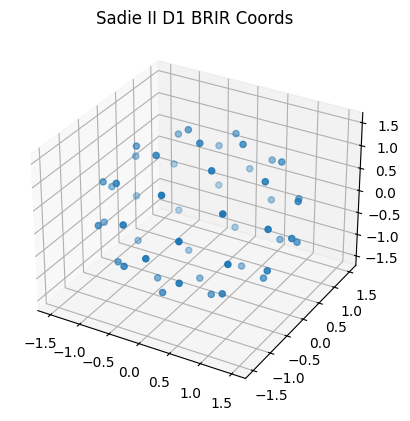

In [2]:
all_pos = load_pos(os.path.join(RIR_DIR,ROOM), doas=False)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(all_pos[:,0],all_pos[:,1],all_pos[:,2])

plt.title("Sadie II D1 BRIR Coords")

## Options for sounds are:
0. bark
1. music
2. thunder
3. lava
4. spider
5. skeleton
6. water
7. meow
8. portal

In [9]:
#initialize SCAPER object
ssc = ss.Scaper(
        DURATION,
        FOREGROUND_DIR,
        RIR_DIR,
        FORMAT,
        ROOM,
        max_event_dur=10,
        speed_limit=1000.0,
        DCASE_format=False
    )
ssc.ref_db = REF_DB
ssc.label_rate = 10
ssc.fg_labels = class_labels


#Add a Dog Bark
class_idx = 0
label = classes[class_idx]
file = filepaths[class_idx]
time = 0
pos = ('const', [0,1.5,0])
snr = 10

ssc.add_event(label=('const',label),
              source_file=('const',file),
              event_time=('const', time),
              event_position=('const',pos),
              snr=('const',snr))

#Add a Spider Sound
class_idx = 4
label = classes[class_idx]
file = filepaths[class_idx]
time = 3
pos = ('const', [0,-1.5,0])
snr = 10

ssc.add_event(label=('const',label),
              source_file=('const',file),
              event_time=('const', time),
              event_position=('const',pos),
              snr=('const',snr))


#add thunder rotating around the listener
class_idx = 2
label = classes[class_idx]
file = filepaths[class_idx]
time = 5
pos = ('line', [-1,3,0],[-1,-3,0])
snr = 10

ssc.add_event(label=('const',label),
              source_file=('const',file),
              event_time=('const', time),
              event_position=('const',pos),
              snr=('const',snr))


#Add a cat
class_idx = 7
label = classes[class_idx]
file = filepaths[class_idx]
time = 8
pos = ('const', [1.5,1.5,1])
snr = 10

ssc.add_event(label=('const',label),
              source_file=('const',file),
              event_time=('const', time),
              event_position=('const',pos),
              snr=('const',snr))

#Add a portal
class_idx = 8
label = classes[class_idx]
file = filepaths[class_idx]
time = 12
pos = ('line', [1,3,3],[1,-2,-2])
snr = 10

ssc.add_event(label=('const',label),
              source_file=('const',file),
              event_time=('const', time),
              event_position=('const',pos),
              snr=('const',snr))

In [10]:
audiofile = os.path.join(OUT_DIR, 'aud', "test_0")
labelfile = os.path.join(OUT_DIR, 'label', "test_0")

In [20]:
ssc.generate(audiofile, labelfile)

In [14]:
Audio(filename=audiofile+'.wav')

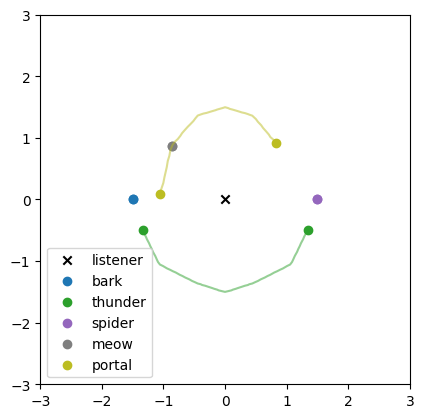

In [7]:
labels = np.genfromtxt(labelfile + '.csv', delimiter=',')
plt.scatter([0],[0], label='listener', color='k', marker='x')
for class_label, class_idx in class_labels.items():
    event_idx = np.where(labels[:,1]==class_idx)
    event_labels = labels[event_idx]
    azi = event_labels[:,3]/360 * 2 * np.pi
    ele = event_labels[:,4]/360 * 2 * np.pi
    r = event_labels[:,5]

    y = r*np.cos(azi) * np.cos(ele)
    x = -r * np.sin(azi) * np.cos(ele)
    z = r * np.sin(ele)
    if len(z)>0:
        plt.plot(x,y, marker='none', alpha=0.5, color=colors[class_idx])
        plt.scatter(x[0],y[0],label=class_label, color=colors[class_idx])
        plt.scatter(x[-1],y[-1], marker='o', color=colors[class_idx])

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='lower left')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

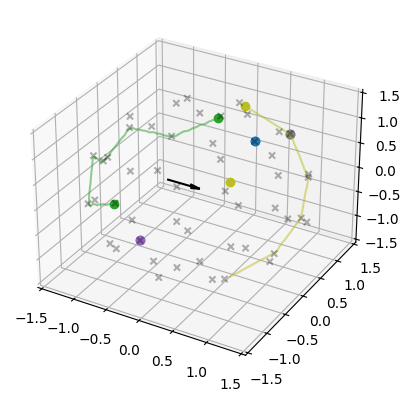

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for class_label, class_idx in class_labels.items():
    event_idx = np.where(labels[:,1]==class_idx)
    event_labels = labels[event_idx]
    azi = event_labels[:,3]/360 * 2 * np.pi
    ele = event_labels[:,4]/360 * 2 * np.pi
    r = event_labels[:,5]

    x = r*np.cos(azi) * np.cos(ele)
    y = r * np.sin(azi) * np.cos(ele)
    z = r * np.sin(ele)
    if len(z)>0:
        plt.plot(x,y,z, marker='none', alpha=0.5, color=colors[class_idx])
        plt.plot(x[0],y[0],z[0],label=class_label, marker='o', color=colors[class_idx])
        plt.plot(x[-1],y[-1],z[0], marker='o', color=colors[class_idx])

ax.scatter(all_pos[:,0],all_pos[:,1],all_pos[:,2], alpha=.3,
           label='BRIR meausurement locations', marker='x', color='k')


ax.quiver([-.5],[0],[0],[0.5],[0],[0], label="listener", color='k')
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
ax.set_zlim([-1.5,1.5])

plt.show()

shulys@kaist.ac.kr yusun shul

FOA-MEIR, ICASSP2022, Masahiro Yasuda
